## Import Libraries

In [298]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Importing data


In [299]:
data=pd.read_csv("C:\\Users\\hp\\Downloads\\salary_prediction_data.csv")
print(data)

       Education  Experience  Location Job_Title  Age  Gender         Salary
0    High School           8     Urban   Manager   63    Male   84620.053665
1            PhD          11  Suburban  Director   59    Male  142591.255894
2       Bachelor          28  Suburban   Manager   61  Female   97800.255404
3    High School          29     Rural  Director   45    Male   96834.671282
4            PhD          25     Urban   Analyst   26  Female  132157.786175
..           ...         ...       ...       ...  ...     ...            ...
995  High School           8  Suburban   Analyst   25  Female   64683.389864
996  High School          24     Urban  Engineer   30  Female   74468.205020
997       Master          18     Rural   Analyst   44    Male   98207.026024
998     Bachelor          27  Suburban  Director   31  Female  108544.922720
999  High School          25     Urban  Director   41  Female   71077.000066

[1000 rows x 7 columns]


## Basic Information

In [300]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Education   1000 non-null   object 
 1   Experience  1000 non-null   int64  
 2   Location    1000 non-null   object 
 3   Job_Title   1000 non-null   object 
 4   Age         1000 non-null   int64  
 5   Gender      1000 non-null   object 
 6   Salary      1000 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB


## Data Cleaning

## Empty cells

In [301]:
data.isna().sum()

Education     0
Experience    0
Location      0
Job_Title     0
Age           0
Gender        0
Salary        0
dtype: int64

### Check Duplicates

In [302]:
print('Number of duplicated rows: ' , len(data[data.duplicated()]))

Number of duplicated rows:  0


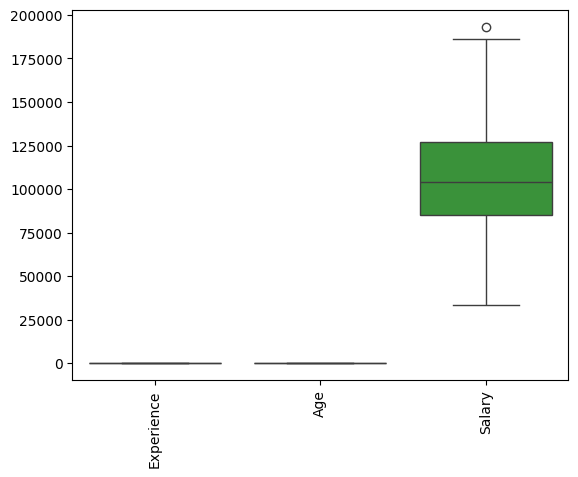

In [303]:
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()

## Encoding Categorial Data

In [304]:
categ_col = data.select_dtypes(include=['object']).columns

# Initialize encoders
label_encoder = LabelEncoder()

# Encode each categorical column using Label Encoding for simplicity
encoded_data = data.copy()
for i in categ_col:
    encoded_data[i] = label_encoder.fit_transform(data[i])

# Display the first 5 rows of the encoded dataset
print(encoded_data)

     Education  Experience  Location  Job_Title  Age  Gender         Salary
0            1           8         2          3   63       1   84620.053665
1            3          11         1          1   59       1  142591.255894
2            0          28         1          3   61       0   97800.255404
3            1          29         0          1   45       1   96834.671282
4            3          25         2          0   26       0  132157.786175
..         ...         ...       ...        ...  ...     ...            ...
995          1           8         1          0   25       0   64683.389864
996          1          24         2          2   30       0   74468.205020
997          2          18         0          0   44       1   98207.026024
998          0          27         1          1   31       0  108544.922720
999          1          25         2          1   41       0   71077.000066

[1000 rows x 7 columns]


## Extract Dependent and Independent Variables

In [305]:
X = encoded_data.iloc[:,0:4]   #Independent variable
y = encoded_data['Salary']     #dependent variable

            Education  Experience  Location  ...       Age    Gender    Salary
Education    1.000000    0.013070  0.018912  ... -0.035050  0.014559  0.649063
Experience   0.013070    1.000000  0.096275  ...  0.044296 -0.020602  0.341918
Location     0.018912    0.096275  1.000000  ... -0.006347  0.044695  0.177018
Job_Title   -0.047592    0.059504  0.015504  ... -0.002767 -0.041861  0.083639
Age         -0.035050    0.044296 -0.006347  ...  1.000000  0.049055 -0.053174
Gender       0.014559   -0.020602  0.044695  ...  0.049055  1.000000  0.028173
Salary       0.649063    0.341918  0.177018  ... -0.053174  0.028173  1.000000

[7 rows x 7 columns]


<Axes: >

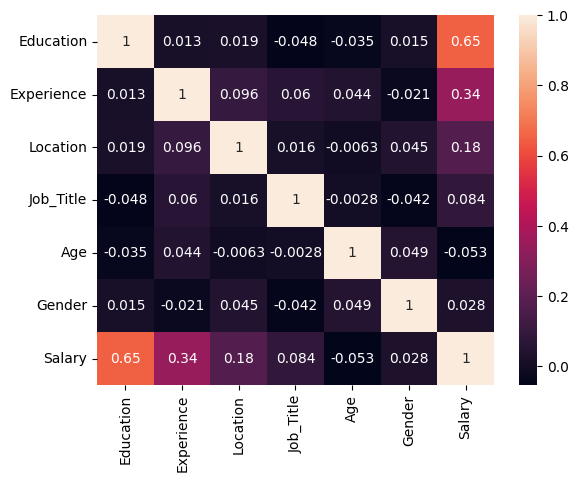

In [306]:
correlation=encoded_data.corr(numeric_only=True)
print(correlation)
sns.heatmap(correlation,annot=True)

## Split Train and Test Data

In [307]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Build Model

In [308]:
# Fitting the MLR model to the training set
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting the test set result
y_pred = model.predict(X_test)

# To compare the actual output values for X_test with the predicted value
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(data)


            Actual      Predicted
521   86677.840109   74691.786519
737   56036.163010   85562.523131
740   92226.871819  117058.122084
660  100710.088052   69636.413004
411   91775.012832   87665.688377
..             ...            ...
408   62915.445683   60054.878882
332   92041.749991   85004.690148
208   85534.397486   95274.879776
613  164373.967469  138871.108614
78    93375.479141   68537.342253

[200 rows x 2 columns]


In [309]:
# predicting the accuracy score
score = r2_score(y_test,y_pred)
print("r2 score is ", score*100,"%")

r2 score is  55.97800943614584 %


In [310]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [311]:
lr = LinearRegression()
lr.fit(X_train,y_train)

gb = GradientBoostingRegressor()
gb.fit(X_train,y_train)
xgb= XGBRegressor()
xgb.fit(X_train,y_train)
# Prediction on the dataset
y_predict1 = lr.predict(X_test)

y_predict3 = gb.predict(X_test)
y_predict4 = xgb.predict(X_test)
# Evaluating
from sklearn import metrics
scorelr = metrics.r2_score(y_test,y_predict1)

scoregb = metrics.r2_score(y_test,y_predict3)
scorexgb = metrics.r2_score(y_test,y_predict4)
print(scorelr,scoregb,scorexgb)

0.5597800943614584 0.8663059815005638 0.8000635635326769
